# Переобученная модель
Стоит задача написать модель, которая доходит до хорших метрик, но быстро начинает переобучаться

Импорт необходимых библиотек

In [2]:
%cd drive/MyDrive/YaMlProject/models/models

/content/drive/MyDrive/YaMlProject/models/models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sys

import numpy as np
from PIL import Image
import tensorflow as tf
import torchvision as tv
from livelossplot import PlotLossesKeras

sys.path.append('../../')

from core.datasets import get_ds

Создаем датасеты

In [4]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test')

Пишем модель

In [6]:
!git add .
git commit -m 

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../../.gitignore
	modified:   ../../core/datasets.py
	modified:   retrained_model.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [28]:
model_retrain = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.AveragePooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization()
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf
])
model_retrain.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Компиляция модели

In [26]:
model_retrain.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())

Обучаем модель

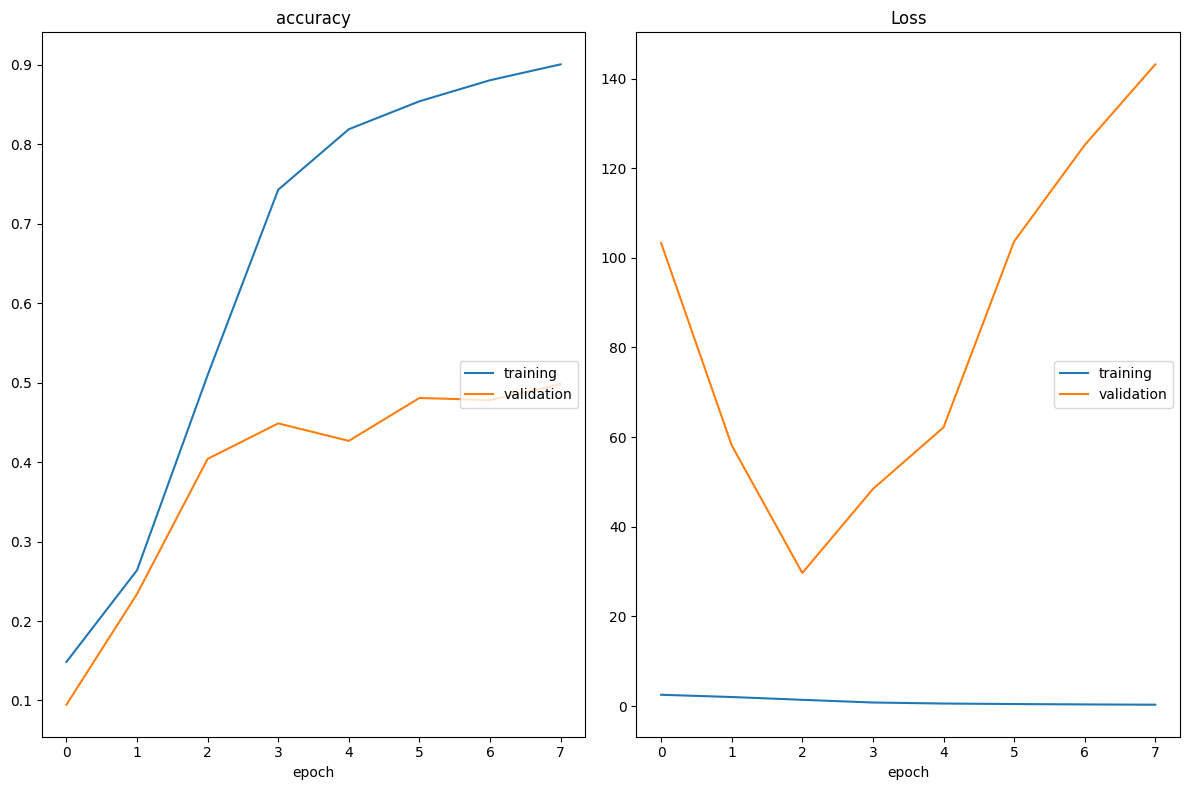

accuracy
	training         	 (min:    0.149, max:    0.900, cur:    0.900)
	validation       	 (min:    0.095, max:    0.498, cur:    0.498)
Loss
	training         	 (min:    0.312, max:    2.530, cur:    0.312)
	validation       	 (min:   29.698, max:  143.162, cur:  143.162)


KeyboardInterrupt: ignored

In [24]:
model_retrain.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)